In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np

## Importing data and EDA

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


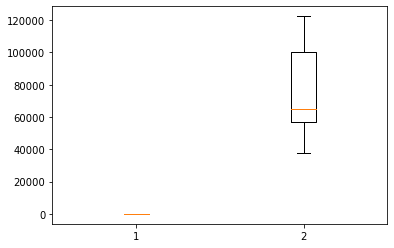

In [5]:
#plt.figure(figsize=(10,20))
plt.boxplot(df)
plt.show()

## Scaling Data

In [6]:
scalar=MinMaxScaler()
scaled_df=pd.DataFrame(scalar.fit_transform(np.array(df.Salary).reshape(-1,1)))

In [7]:
scaled_df

,0
0,0.019041
1,0.100094
2,0.000000
3,0.068438
4,0.025514
5,0.223376
6,0.264812
7,0.197425
8,0.315545
9,0.229837


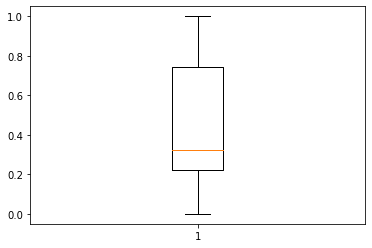

In [22]:
#plt.figure(figsize=(10,20))
plt.boxplot(scaled_df)
plt.show()

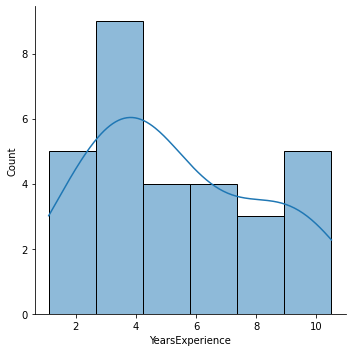

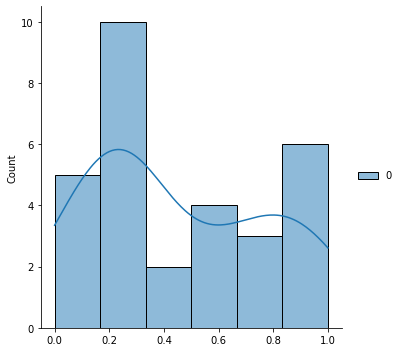

In [9]:
import seaborn as sns
sns.displot(df.YearsExperience,kde=True)
sns.displot(scaled_df,kde=True)

In [10]:
xTrain,xTest,yTrain,yTest=train_test_split(np.array(df.YearsExperience).reshape(-1,1),scaled_df,random_state=42)

## Creating model and fit,predict

In [11]:
model=LinearRegression()
model.fit(xTrain,yTrain)

LinearRegression()

In [12]:
model.score(xTest,yTest)

0.9347210011126783

In [14]:
residual=scalar.inverse_transform(yTest)-scalar.inverse_transform(model.predict(xTest))
res_df=pd.DataFrame()
res_df[0]=pd.DataFrame(xTest)
res_df[1]=residual
res_df

,0,1
0,9.6,-2804.881801
1,4.9,-3458.106227
2,8.2,11491.540710
3,5.3,7943.487342
4,3.2,8979.621109
5,3.7,-2961.886931
6,10.3,391.406943
7,8.7,2425.032671


In [19]:
scalar.inverse_transform(model.predict([[8.3]]))

array([[103257.56089748]])

## Residual Plot

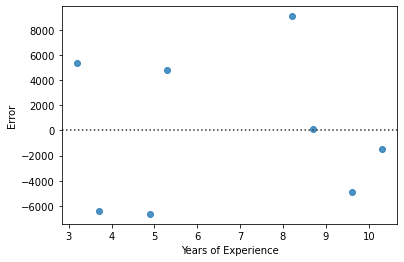

In [28]:
import seaborn as sns
p=sns.residplot(x=res_df[0],y=res_df[1],data=res_df)
p.set( xlabel = "Years of Experience", ylabel = "Error")
plt.show()

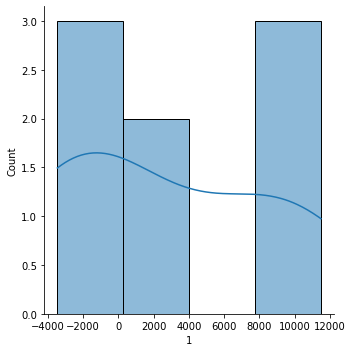

In [32]:
sns.displot(res_df[1],kde=True)